<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/4_Analyzing_prices_using_the_AR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREGUNTA 4

In [ ]:
#Importando los paquetes relevantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Ruta del archivo en Google Drive
ruta_drive = "/content/drive/My Drive/Index_2023.csv"

# Ruta de destino en Google Colab
ruta_colab = "/content/Index_2023.csv"

# Copia el archivo desde Google Drive a Google Colab
shutil.copy(ruta_drive, ruta_colab)#Importación de datos y preprocesamiento
raw_csv_data = pd.read_csv("Index_2023.csv")
df_comp = raw_csv_data.copy()
df_comp['Date'] = pd.to_datetime(df_comp['Date'], format='%Y-%m-%d', dayfirst=True)
df_comp.set_index("Date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.ffill()
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


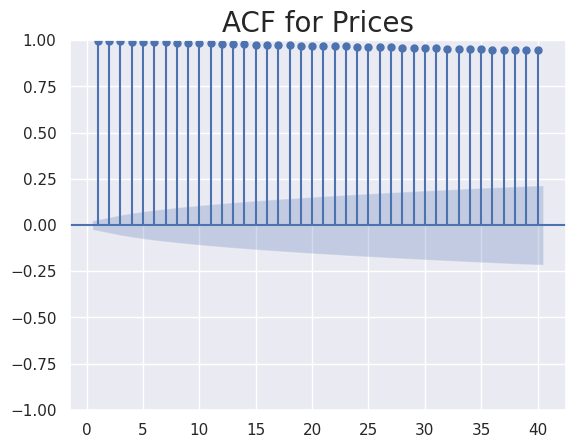

In [ ]:
#La ACF
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()


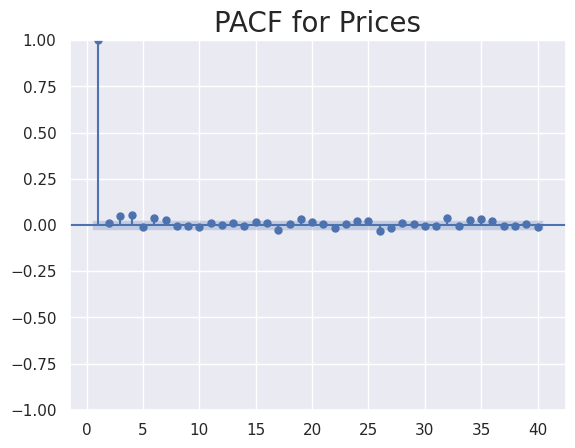

In [ ]:
#La PACF
import warnings
warnings.filterwarnings("ignore")

#El modelo AR (1)
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()



In [ ]:
#Higher-Lag AR Models
model_ar = ARIMA(df.market_value, order=(1, 0, 0))
results_ar = model_ar.fit()
print(results_ar.summary())

model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34040.260
Date:                Sat, 14 Oct 2023   AIC                          68086.520
Time:                        02:38:35   BIC                          68106.717
Sample:                    01-07-1994   HQIC                         68093.523
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.3928    537.395     10.044      0.000    4344.118    6450.668
ar.L1          0.9989      0.001   1364.762      0.000       0.997       1.000
sigma2      3435.2289     36.815     93.311      0.0

In [ ]:
#LLR Test
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

#Comparación de Higher-Lag AR Models
LLR_test(model_ar_2, model_ar_3)

LLR_test(model_ar_3, model_ar_4)

model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))
model_ar_5 = ARIMA(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))
model_ar_6 = ARIMA(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))
model_ar_7 = ARIMA(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))
model_ar_8 = ARIMA(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34024.268
Date:                Sat, 14 Oct 2023   AIC                          68060.537
Time:                        02:39:35   BIC                          68100.931
Sample:                    01-07-1994   HQIC                         68074.541
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5397.3912    495.376     10.896      0.000    4426.472    6368.311
ar.L1          0.9874      0.009    110.288      0.000       0.970       1.005
ar.L2         -0.0362      0.012     -2.957      0.0

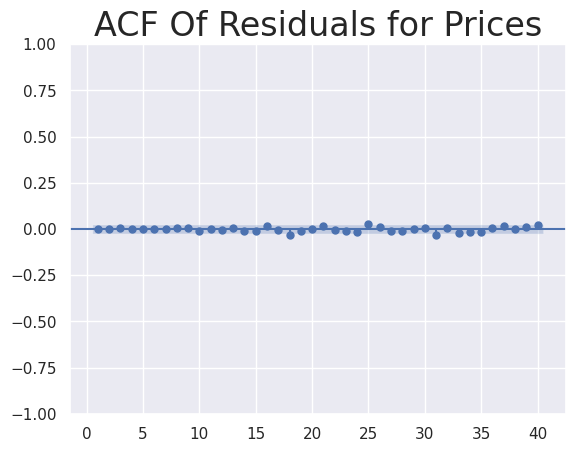

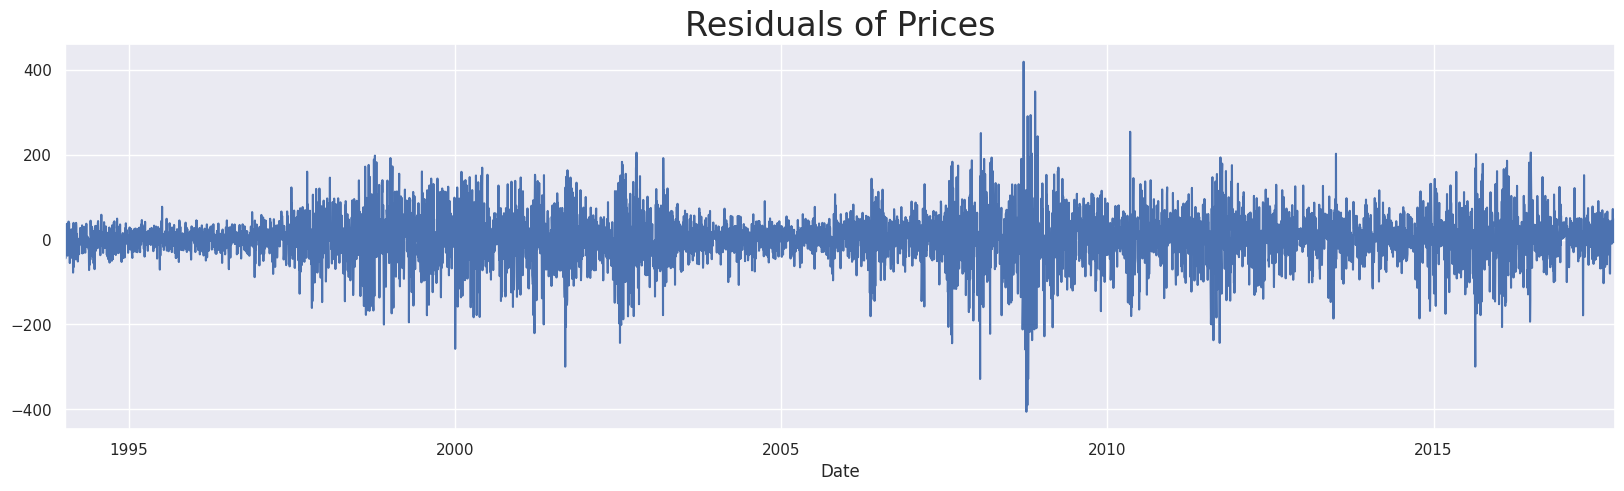

In [ ]:
#Analizando los residuos
df['res_price'] = results_ar_7.resid
df.res_price.mean()
df.res_price.var()
sts.adfuller(df.res_price)
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()

